# EX1 Building and visualising networks

**1.1.1 Star network**

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

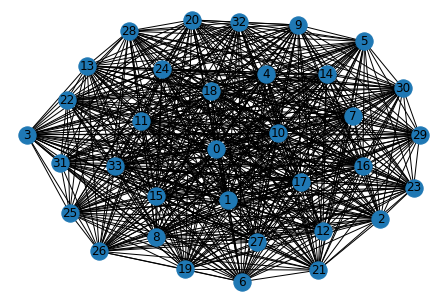

In [2]:
G = nx.Graph()
L=list(range(0,34,1))
G.add_nodes_from(L)
for i in L:
    for j in L:
        if i!=j:
            G.add_edges_from([(i, j)])

nx.draw(G, with_labels=True)
plt.show()

**1.1.2 Fully-connected network**

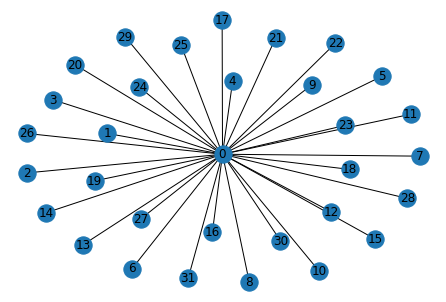

In [3]:
G = nx.Graph()
L=list(range(0,32,1))
G.add_nodes_from(L)
for j in L:
    if j!=0:
        G.add_edges_from([(0, j)])

nx.draw(G, with_labels=True)
plt.show()

**1.1.3 One-dimensional lattice**

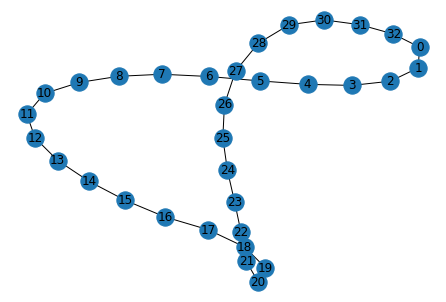

In [4]:
G = nx.Graph()
L=list(range(0,32,1))
G.add_nodes_from(L)
for i in L:
    G.add_edges_from([(i, i+1)])
    G.add_edges_from([(0, 32)])

nx.draw(G, with_labels=True)
plt.show()

**1.2.1 average degree ⟨𝑘⟩ and the density 𝛿**

*Zachary Karate Club*

In [5]:
Z = nx.read_gml('graph_karate.gml', label='id')
Num_Z = Z.number_of_nodes()

deg_Z = dict(Z.degree())
average_degree_Z=sum(deg_Z.values())/Num_Z
density_Z = nx.density(Z)

print('average_degree of Zachary:', average_degree_Z ,'\n''density of Zachary:', density_Z)

average_degree of Zachary: 4.588235294117647 
density of Zachary: 0.13903743315508021


*NetSci collaborations*

In [6]:
NS = nx.read_gml('graph_netsci2.gml', label='id')
Num_NS = NS.number_of_nodes()

deg_NS = dict(NS.degree())
average_degree_NS=sum(deg_NS.values())/Num_NS
density_NS = nx.density(NS)

print('average_degree of Zachary:', average_degree_NS ,'\n''density of Zachary:', density_NS)

average_degree of Zachary: 3.753593429158111 
density of Zachary: 0.0025709544035329526


*Facebook friendships*

In [7]:
F = nx.read_gml('graph_facebook.gml',label='id')
Num_F = F.number_of_nodes()

deg_F = dict(F.degree())
average_degree_F = sum(deg_F.values())/Num_F
density_F = nx.density(F)

print('average_degree of Facebook:', average_degree_F ,'\n''density of Facebook:', density_F)

average_degree of Facebook: 43.69101262688784 
density of Facebook: 0.010819963503439287


*max_degree*

In [10]:
def max_degree(graph):
    deg = dict(graph.degree())
    #node_info=max(deg.items(),key=lambda x:x[1])
    highest = max(deg.values())
    #max_id = node_info[0]
    #max_value = node_info[1]
    return ([(k,v) for k, v in deg.items() if v == highest])

In [11]:
graph_dic = {'karate': Z, 'NetSci': NS, 'Facebook': F}
for graph in graph_dic.items():
    max_degree_node = max_degree(graph[1])
    
    for i in max_degree_node:
        print(f'{graph[0]}: \n  Max id: {i[0]} | maxvalue: {i[1]}')

karate: 
  Max id: 33 | maxvalue: 17
NetSci: 
  Max id: 42 | maxvalue: 34
Facebook: 
  Max id: 107 | maxvalue: 1045


*degree distribution*

*Zachary Karate Club, better visual: lin-lin*

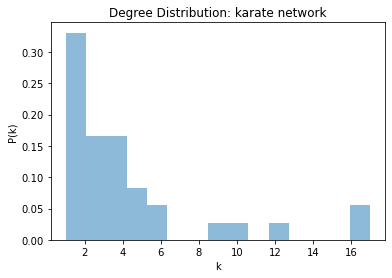

In [12]:
graph = graph_dic["karate"]
deg = np.asarray([d for n, d in graph.degree()])
bins = 15
fig, ax = plt.subplots()
plt.hist(deg, bins, density=True, alpha=0.5)
plt.title("Degree Distribution: karate network")
plt.ylabel("P(k)")
plt.xlabel("k")
plt.show()  

*NetSci collaborations, better visual: lin-log or log-log*

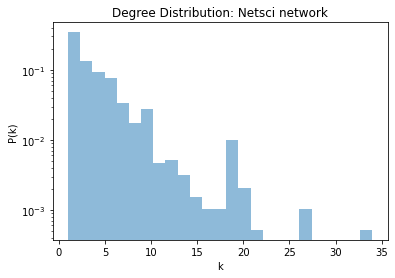

In [13]:
graph = graph_dic['NetSci']
deg = np.asarray([d for n, d in graph.degree()])
bins = 25
fig, ax = plt.subplots()
plt.title("Degree Distribution: Netsci network")
plt.ylabel("P(k)")
plt.xlabel("k")
plt.hist(deg, bins, density=True, alpha=0.5)
plt.yscale('log')
plt.show()  

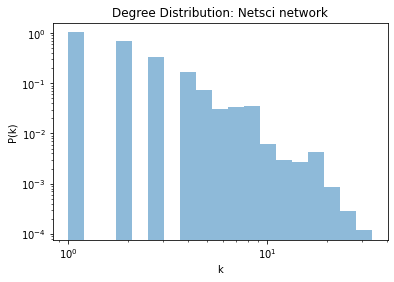

In [21]:
graph = graph_dic['NetSci']
deg = np.asarray([d for n, d in graph.degree()])
binlog = np.logspace(np.log10(min(deg)),np.log10(max(deg)), 20)
fig, ax = plt.subplots()
plt.title("Degree Distribution: Netsci network")
plt.ylabel("P(k)")
plt.xlabel("k")
x, bins, p=plt.hist(deg, binlog, density=True, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.show() 

*Facebook friendships, better visual: log-log*

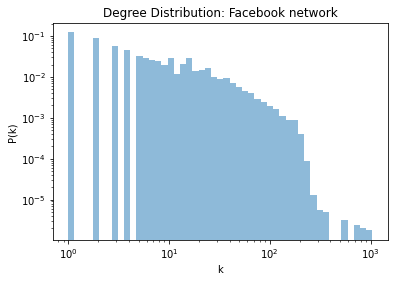

In [15]:
graph = graph_dic["Facebook"]
deg = np.asarray([d for n, d in graph.degree()])
binlog = np.logspace(np.log10(min(deg)),np.log10(max(deg)), 50)
fig, ax = plt.subplots()
plt.title("Degree Distribution: Facebook network")
plt.ylabel("P(k)")
plt.xlabel("k")
x, bins, p=plt.hist(deg, binlog, density=True, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.show()